In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tech=pd.read_csv("tech.csv")

In [3]:
tech.shape

(1720, 5)

In [4]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Statistic Label   1720 non-null   object
 1   Year              1720 non-null   int64 
 2   Quarter           1720 non-null   object
 3   Industry Sector   1720 non-null   object
 4   VALUE             1720 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 67.3+ KB


In [5]:
tech.describe()

Year         VALUE
count  1720.000000  1.720000e+03
mean   2018.883721  2.608110e+08
std       3.105358  2.192405e+09
min    2014.000000  0.000000e+00
25%    2016.000000  2.000000e+05
50%    2019.000000  3.500000e+06
75%    2022.000000  2.490000e+07
max    2024.000000  5.845940e+10

In [6]:
tech.head(25)

Statistic Label  Year Quarter  \
0   Capital Acquisitions in Industry  2014      Q1   
1   Capital Acquisitions in Industry  2014      Q1   
2   Capital Acquisitions in Industry  2014      Q1   
3   Capital Acquisitions in Industry  2014      Q1   
4   Capital Acquisitions in Industry  2014      Q1   
5   Capital Acquisitions in Industry  2014      Q1   
6   Capital Acquisitions in Industry  2014      Q1   
7   Capital Acquisitions in Industry  2014      Q1   
8   Capital Acquisitions in Industry  2014      Q1   
9   Capital Acquisitions in Industry  2014      Q1   
10  Capital Acquisitions in Industry  2014      Q1   
11  Capital Acquisitions in Industry  2014      Q1   
12  Capital Acquisitions in Industry  2014      Q1   
13  Capital Acquisitions in Industry  2014      Q1   
14  Capital Acquisitions in Industry  2014      Q1   
15  Capital Acquisitions in Industry  2014      Q1   
16  Capital Acquisitions in Industry  2014      Q1   
17  Capital Acquisitions in Industry  2014      Q1   
18  Capital Acquisitions in Industry  2014      Q1   
19  Capital Acquisitions in Industry  2014      Q1   
20  Capital Acquisitions in Industry  2014      Q2   
21  Capital Acquisitions in Industry  2014      Q2   
22  Capital Acquisitions in Industry  2014      Q2   
23  Capital Acquisitions in Industry  2014      Q2   
24  Capital Acquisitions in Industry  2014      Q2   

                                     Industry Sector        VALUE  
0                                       Textiles (13)      400000  
1                                Wearing apparel (14)           0  
2       Wood and wood products, except furniture (16)     1500000  
3                       Paper and paper products (17)      700000  
4    Printing and reproduction of recorded media (18)     4300000  
5                    Rubber and plastic products (22)     6000000  
6            Other non-metallic mineral products (23)     6000000  
7                           Electrical equipment (27)     2400000  
8                 Machinery and equipment n.e.c. (28)     9100000  
9   Electricity, gas, steam and air conditioning s...   223600000  
10                               Mining and quarrying    14900000  
11          Transportable goods industries (05 to 33)   876700000  
12                              Industries (05 to 39)  1109700000  
13                Food products and beverages (10,11)    91100000  
14                Manufacturing industries (10 to 33)   861800000  
15  Tobacco: leather; petroleum; transport equipme...     5500000  
16             Chemicals and pharmaceuticals (20, 21)   117800000  
17  Basic metals and fabricated metal products (24...    13400000  
18  Computer, electronic and optical products; oth...   603600000  
19  Water supply; sewerage, waste management and r...     9400000  
20                                      Textiles (13)      700000  
21                               Wearing apparel (14)           0  
22      Wood and wood products, except furniture (16)     1500000  
23                      Paper and paper products (17)     1400000  
24   Printing and reproduction of recorded media (18)     3900000

In [15]:
tech.isnull().sum()

Statistic Label     0
Year                0
Quarter             0
Industry Sector     0
VALUE               0
dtype: int64

In [7]:
tech.loc[2]

Statistic Label                  Capital Acquisitions in Industry
Year                                                         2014
Quarter                                                        Q1
Industry Sector     Wood and wood products, except furniture (16)
VALUE                                                     1500000
Name: 2, dtype: object

In [8]:
pub = tech["Industry Sector "]

In [9]:
Textiles=pub.str.contains("Textiles")
Wearing_apparel=pub.str.contains("Wearing apparel")
Wood_and_wood_products_except_furniture = pub.str.contains("Wood")
Paper_and_paper_products=pub.str.contains("Paper and paper products")
Printing=pub.str.contains("Printing")
Rubber_and_plastic_products=pub.str.contains("Rubber and plastic products")
non_metallic_mineral_products=pub.str.contains("non-metallic mineral products")
Electrical_equipment=pub.str.contains("Electrical equipment")
Machinery_and_equipment=pub.str.contains("Machinery and equipment n.e.c.")
Electricity=pub.str.contains("Electricity, gas, steam and air conditioning supply")
Transportable_goods_industries=pub.str.contains("Transportable goods industries")
Industries=pub.str.contains("Industries")
Food_products_and_beverages=pub.str.contains("Food products and beverages")
Manufacturing_industries=pub.str.contains("Manufacturing industries")
Tobacco_leather_petroleum_transport_equipment_furniture_repair_of_machinery=pub.str.contains("Tobacco: leather; petroleum; transport equipment; furniture; repair of machinery")
Chemicals_and_pharmaceuticals=pub.str.contains("Chemicals and pharmaceuticals")
Basic_metals_and_fabricated_metal_products=pub.str.contains("Basic metals and fabricated metal products")
Computer_electronic_and_optical_products_other_manufacturing=pub.str.contains("Computer, electronic and optical products; other manufacturing")
Water_supply_sewerage_waste_management_and_remediation_activities=pub.str.contains("Water supply; sewerage, waste management and remediation activities")

In [10]:
tech["Industry Sector "]=np.where(Textiles,"Textiles",
                        np.where(Wearing_apparel,"Wearing apparel",
                        np.where(Wood_and_wood_products_except_furniture,"Wood",
                        np.where(Paper_and_paper_products,"Paper and paper products",
                        np.where(Printing,"Printing",
                        np.where(Rubber_and_plastic_products,"Rubber and plastic products",
                        np.where(non_metallic_mineral_products,"non-metallic mineral products",
                        np.where(Electrical_equipment,"Electrical equipment",
                        np.where(Machinery_and_equipment,"Machinery and equipment n.e.c.",
                        np.where(Electricity,"Electricity",
                        np.where(Transportable_goods_industries,"Transportable goods industries",
                        np.where(Industries,"Industries",
                        np.where(Food_products_and_beverages,"Food products and beverages",
                        np.where(Manufacturing_industries,"Manufacturing industries",
                        np.where(Tobacco_leather_petroleum_transport_equipment_furniture_repair_of_machinery,"Tobacco: leather; petroleum; transport equipment; furniture; repair of machinery",
                        np.where(Chemicals_and_pharmaceuticals,"Chemicals and pharmaceuticals",
                        np.where(Basic_metals_and_fabricated_metal_products,"Basic metals and fabricated metal products",
                        np.where(Computer_electronic_and_optical_products_other_manufacturing,"Computer, electronic and optical products; other manufacturing",
                        np.where(Water_supply_sewerage_waste_management_and_remediation_activities,"Water supply; sewerage, waste management and remediation activities",
                        pub.str.replace("-"," "))))))))))))))))))))

In [11]:
tech["Industry Sector "].head()

0                    Textiles
1             Wearing apparel
2                        Wood
3    Paper and paper products
4                    Printing
Name: Industry Sector , dtype: object

In [12]:
tech.head(21)

Statistic Label  Year Quarter  \
0   Capital Acquisitions in Industry  2014      Q1   
1   Capital Acquisitions in Industry  2014      Q1   
2   Capital Acquisitions in Industry  2014      Q1   
3   Capital Acquisitions in Industry  2014      Q1   
4   Capital Acquisitions in Industry  2014      Q1   
5   Capital Acquisitions in Industry  2014      Q1   
6   Capital Acquisitions in Industry  2014      Q1   
7   Capital Acquisitions in Industry  2014      Q1   
8   Capital Acquisitions in Industry  2014      Q1   
9   Capital Acquisitions in Industry  2014      Q1   
10  Capital Acquisitions in Industry  2014      Q1   
11  Capital Acquisitions in Industry  2014      Q1   
12  Capital Acquisitions in Industry  2014      Q1   
13  Capital Acquisitions in Industry  2014      Q1   
14  Capital Acquisitions in Industry  2014      Q1   
15  Capital Acquisitions in Industry  2014      Q1   
16  Capital Acquisitions in Industry  2014      Q1   
17  Capital Acquisitions in Industry  2014      Q1   
18  Capital Acquisitions in Industry  2014      Q1   
19  Capital Acquisitions in Industry  2014      Q1   
20  Capital Acquisitions in Industry  2014      Q2   

                                     Industry Sector        VALUE  
0                                            Textiles      400000  
1                                     Wearing apparel           0  
2                                                Wood     1500000  
3                            Paper and paper products      700000  
4                                            Printing     4300000  
5                         Rubber and plastic products     6000000  
6                       non-metallic mineral products     6000000  
7                                Electrical equipment     2400000  
8                      Machinery and equipment n.e.c.     9100000  
9                                         Electricity   223600000  
10                               Mining and quarrying    14900000  
11                     Transportable goods industries   876700000  
12                                         Industries  1109700000  
13                        Food products and beverages    91100000  
14                           Manufacturing industries   861800000  
15  Tobacco: leather; petroleum; transport equipme...     5500000  
16                      Chemicals and pharmaceuticals   117800000  
17         Basic metals and fabricated metal products    13400000  
18  Computer, electronic and optical products; oth...   603600000  
19  Water supply; sewerage, waste management and r...     9400000  
20                                           Textiles      700000

In [13]:
tech['Statistic Label'] = tech['Statistic Label'].replace("Capital Acquisitions in Industry", 0)
tech['Statistic Label'] = tech['Statistic Label'].replace("Capital Sales in Industry", 1)

C:\Users\Jeisson S. Preciado\AppData\Local\Temp\ipykernel_10804\391807593.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tech['Statistic Label'] = tech['Statistic Label'].replace("Capital Sales in Industry", 1)


In [14]:
tech.head(1000)

Statistic Label  Year Quarter  \
0                  0  2014      Q1   
1                  0  2014      Q1   
2                  0  2014      Q1   
3                  0  2014      Q1   
4                  0  2014      Q1   
..               ...   ...     ...   
995                1  2015      Q2   
996                1  2015      Q2   
997                1  2015      Q2   
998                1  2015      Q2   
999                1  2015      Q2   

                                      Industry Sector      VALUE  
0                                             Textiles    400000  
1                                      Wearing apparel         0  
2                                                 Wood   1500000  
3                             Paper and paper products    700000  
4                                             Printing   4300000  
..                                                 ...       ...  
995  Tobacco: leather; petroleum; transport equipme...   2000000  
996                      Chemicals and pharmaceuticals  81900000  
997         Basic metals and fabricated metal products    200000  
998  Computer, electronic and optical products; oth...    200000  
999  Water supply; sewerage, waste management and r...   1500000  

[1000 rows x 5 columns]

C:\Users\Jeisson S. Preciado\AppData\Local\Temp\ipykernel_10804\3408552033.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tech_top_10, x='Industry Sector ', y='VALUE', ci=None)


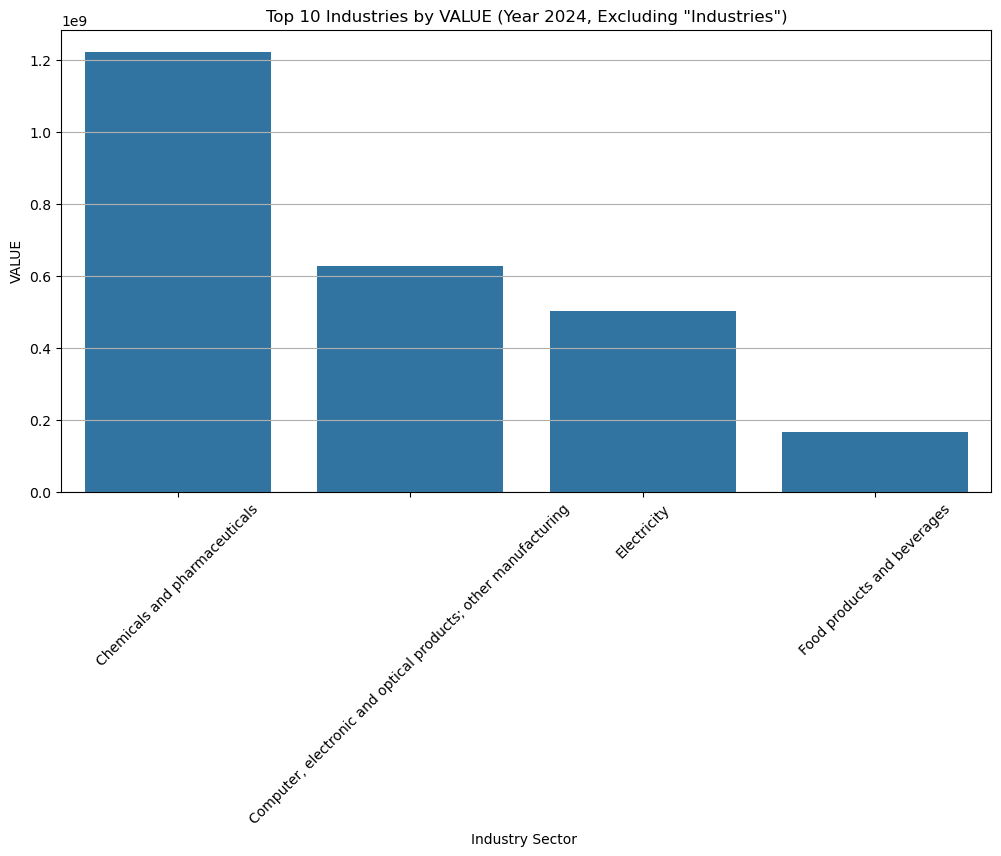

In [55]:
last_year = tech['Year'].max()
tech_last_year = tech[tech['Year'] == last_year]
tech_last_year = tech_last_year[tech_last_year['Industry Sector '] != "Industries"]

tech_top_10 = tech_last_year.sort_values(by='VALUE', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=tech_top_10, x='Industry Sector ', y='VALUE', ci=None)
plt.title(f'Top 10 Industries by VALUE (Year {last_year}, Excluding "Industries")')
plt.xlabel('Industry Sector ')
plt.ylabel('VALUE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
